In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import pyarabic.araby as araby
from wordcloud import WordCloud, STOPWORDS
from bidi.algorithm import get_display
import arabic_reshaper
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


In [4]:
MSA=pd.read_csv('MSA_.csv')
QADI=pd.read_csv('QADIV0.1.1.csv')
IADD=pd.read_csv('IADDV0.1.1.csv')
MADAR=pd.read_csv('MADAR.csv')


C:\Users\lafifi hamza\AppData\Local\Temp\ipykernel_15344\1482775570.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  IADD=pd.read_csv('IADDV0.1.1.csv')


In [6]:
QADI

,tweet,region
0,ياخي المدرب أختاره والمدرب دخله والمدرب بارك ا...,AE
1,شو الي قاعد يجري فالنصر يا أخوه خسر المباراة س...,AE
2,الي يبحث عن مشكلة الوصل راح يحصلها فالجولان,AE
3,انا مش معترض على تغير عامر الي دخل مكان عامر ا...,AE
4,تراجع مخيف في مستوى الحارس الكبير ماجد ناصر مش...,AE
...,...,...
450470,اليوم الطايف وبكره مابعد بعدالطايف باذن الواحد...,YE
450471,شفت الفيديو يا شموخ امس وقلت ماعدباقي الا يقول...,YE
450472,وكمان يسموه خادم الحرمين لعنتي عليكم ال_سعود,YE
450473,كان ودي اصدقك بس جبتها قويه قويه,YE


In [7]:
QADI=QADI[QADI['tweet'].isnull()==False]
IADD=IADD[IADD['tweet'].isnull()==False]
MADAR=MADAR[MADAR['text'].isnull()==False]

In [8]:
def length_text(data):
    try:
        text_length = [ len(text.split()) for text in data['text']]
    except:
        try:     
            text_length = [ len(text.split()) for text in data['tweet']]
        except:
            text_length = [ len(text.split()) for text in data['sent']]
    

    print("Max of text len: ",np.max(text_length))
    print("mean of text len: ",np.mean(text_length))
    import matplotlib.pyplot as plt
    plt.hist(text_length,bins= range(200),density=True)
    plt.show()
     

Max of text len:  90
mean of text len:  81.0928145552892


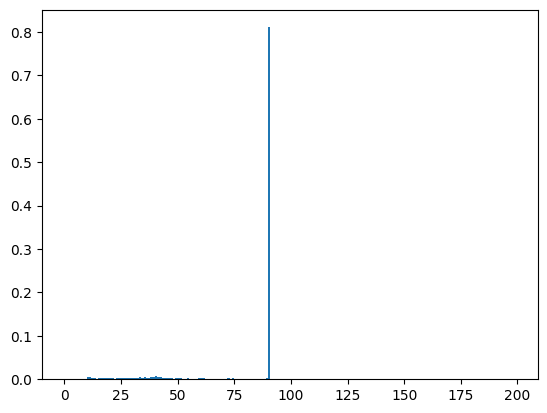

In [9]:
length_text(MSA)

Max of text len:  87
mean of text len:  12.938796079432562


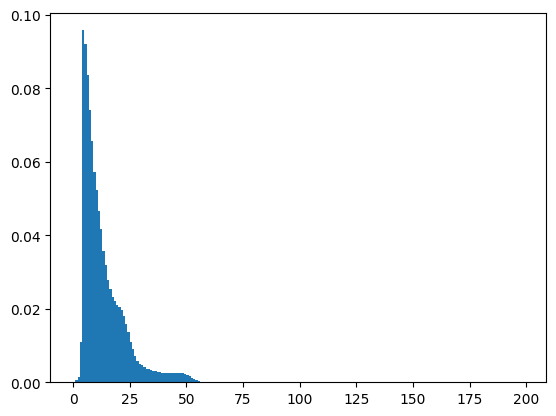

In [10]:
length_text(QADI)

Max of text len:  7945
mean of text len:  11.654746130217431


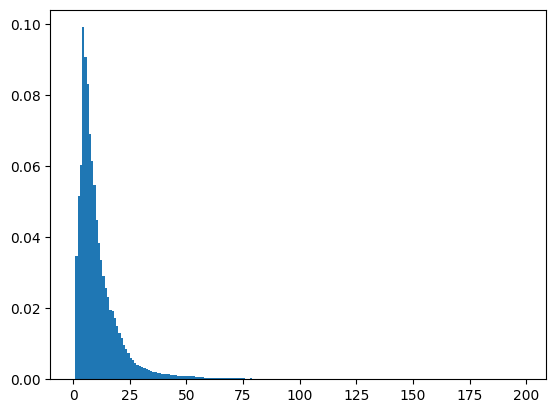

In [11]:
length_text(IADD)

Max of text len:  50
mean of text len:  5.630514558165698


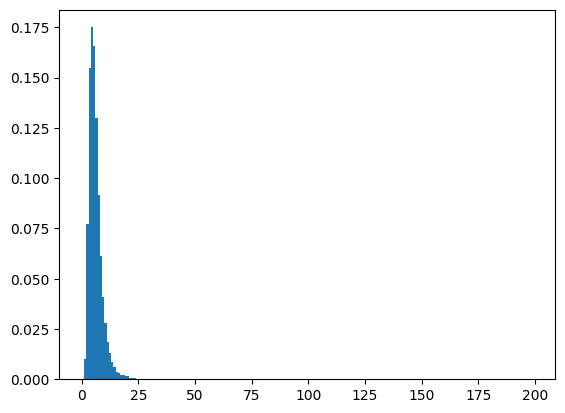

In [12]:
length_text(MADAR)

In [33]:
QADI[QADI['dialect']=='MA'][:20000]

,text,dialect
273035,احلى شي صوتي انا عارفاه,MA
273036,ولا يحرمني منك يا روحي انتي يديم لي قلبك الطيب,MA
273037,تسابقني خطاي لموعد رجوعك أنا الي غير قلبك ما ع...,MA
273038,منتظر رجعتك رغم الظروف ماسك العهد لو طال البطى...,MA
273039,تستاهل جنون انت الصديق الصدوق مهما سوينا قليل ...,MA
...,...,...
283973,اغرب المنتجات الي مكن تشتريها من امازون قفاز ث...,MA
283974,ازاي تعرف الحاجه الي انت شغوف بيها ادرس,MA
283975,هذا ما عندكم تعلم كذا وتعلم كذا وكأنكم خلقتم م...,MA
283976,غادي نخلص كثر من ء0ده باش نرجعو اله ياخد الحق ...,MA


In [ ]:
dialects=list(QADI['country'].unique())

In [23]:
QADI.dialect.unique()

array(['AE', 'BH', 'DZ', 'EG', 'IQ', 'JO', 'KW', 'LB', 'LY', 'MA', 'OM',
       'PL', 'QA', 'SA', 'SD', 'SY', 'TN', 'YE'], dtype=object)

In [21]:
QADI=QADI.rename(columns={'tweet':'text','region':'dialect'})
# IADD=IADD[['tweet','country']].rename(columns={'tweet':'text','country':'dialect'})
MADAR=MADAR.rename(columns={'sent':'text','country':'dialect'})
MSA=MSA[['text','dialect']]

In [24]:
data=pd.DataFrame()
dialects=['AE', 'BH', 'DZ', 'EG', 'IQ', 'JO', 'KW', 'LB', 'LY', 'MA', 'OM',
       'PL', 'QA', 'SA', 'SD', 'SY', 'TN', 'YE']
for dialect in dialects:
        data=pd.concat([data,QADI[QADI['dialect']==dialect][:20000]])

In [25]:
data.groupby('dialect').count()

,text
dialect,
AE,20000
BH,20000
DZ,15916
EG,20000
IQ,15196
JO,20000
KW,20000
LB,20000
LY,20000


In [26]:
for dialect in dialects:
    temp=data['dialect'][data['dialect']==dialect].count()
    if (temp<20000):
        data=pd.concat([data,MADAR[MADAR['dialect']==dialect][:(20000-temp)]])

In [27]:
data.groupby('dialect').count()

,text
dialect,
AE,20000
BH,20000
DZ,17916
EG,20000
IQ,20000
JO,20000
KW,20000
LB,20000
LY,20000


In [28]:
for dialect in dialects:
    temp=data['dialect'][data['dialect']==dialect].count()
    if (temp<20000):
        data=pd.concat([data,IADD[IADD['dialect']==dialect][:(20000-temp)]])

In [29]:
data.groupby('dialect').count()

,text
dialect,
AE,20000
BH,20000
DZ,17916
EG,20000
IQ,20000
JO,20000
KW,20000
LB,20000
LY,20000


In [30]:
#add MSA
data=pd.concat([data,MSA[:10000]])
data=pd.concat([data,MADAR[MADAR['dialect']=="MSA"][:10000]])

In [31]:
data.groupby('dialect').count()

,text
dialect,
AE,20000
BH,20000
DZ,17916
EG,20000
IQ,20000
JO,20000
KW,20000
LB,20000
LY,20000


In [32]:
data.to_csv("data_v0.1.1.csv",index=False)

In [35]:
data_=pd.read_csv("data_v0.1.0.csv")

In [41]:
import matplotlib.pyplot as plt
def length_text(data):
    try:
        text_length = [ len(text.split()) for text in data['text']]
    except:
        try:     
            text_length = [ len(text.split()) for text in data['tweet']]
        except:
            text_length = [ len(text.split()) for text in data['sent']]
    

    
    plt.title("mean of text len: "+str(np.mean(text_length)))
    
    plt.hist(text_length,bins= range(200),density=True)
    plt.show()
   

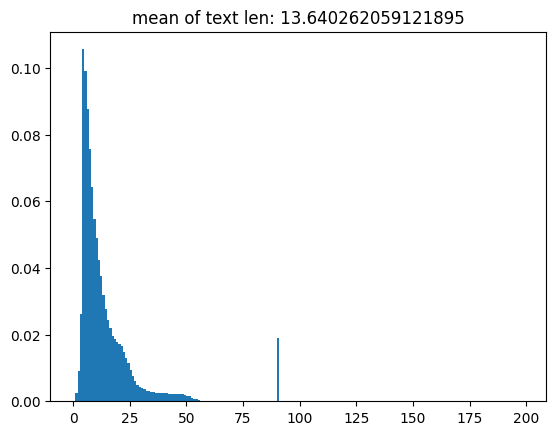

In [42]:
length_text(data_)#V1.0

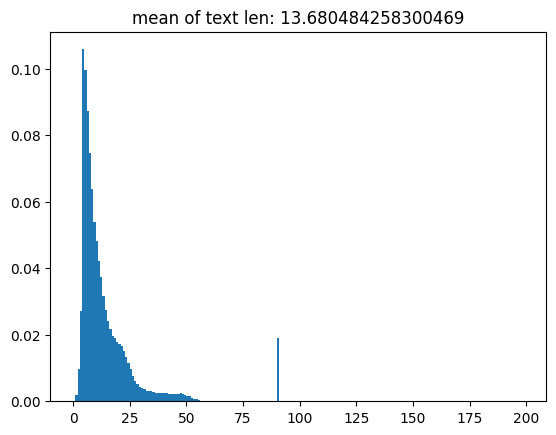

In [44]:
length_text(data)#V1.1